#Radiometer Experiment 3 - SDR offending signal rejection by bandwidth

## Experimental setup

Experiment 3 is used to verify that the software defined radio will indeed reject outside signals that fall outside of the bandwidth that the SDR is set to.  The receiver on the SDR is a wideband reciever that is capable of receiving signals from 800 MHz to 2.3 GHz.   The tuning and bandwidth are then set by software.  Bandwidth is controlled by setting the sample rate for the SDR.  By limiting the sample rate, we also limit the bandwidth.  This experiment is also a pre-cursor to Experiment 4 which demonstrates handling an offending signal that falls within the bandwidth or sample rate of the software defined radio.

<img src="https://lh5.googleusercontent.com/-_bvQbkgLV_w/UysOraiXe7I/AAAAAAAByaE/ShoKiHAOc5g/w917-h688-no/IMG_20140320_104648.jpg" alt="SDR" width=80%>

## Software Defined Radio setup
The Software Defined Radio uses a N200 SDR with GNURadio running a custom code for the radiometer.  This program includes a GUI that allows for us to monitor the radiometer as well as control many of the properties of the radiometer such as frequency, bandwidth and integration time.  
<img src="https://lh6.googleusercontent.com/-8X3Tm3wyh-k/U-mZk_99UcI/AAAAAAAB5Vk/-Up_76efr7E/w1214-h759-no/Lab_0_Spectrum.png" alt="SDR" width=100%>

The program stores the total power data as a binary format which we can then load into a program such as Matlab or Python.  While we can also store the raw I/Q values as well, this results in data files that can be easily 20-40 GB in size for typical 10-15 minute experimental run.  The total power binary files are much smaller (usually less than 200 kB) and make it much easier to use.

The following table shows the configuration of the software defined radio and square-law detector.  This information is important as it let's us know the frequency, bandwidth and integration time.  We can use this information to calculate what the $NE\Delta T$ should be.

|Device  |Frequency  |Bandwidth  |Integration time
|--------|-----------------------
|N200    | 1406 MHz    |10 MHz or Msps| 2 seconds

## Signal generator
<img src="https://lh5.googleusercontent.com/-_Lw5DR4DFG8/VMZydmiJTTI/AAAAAAAB9SE/jib6LOl8ej8/w917-h688-no/IMG_20150126_105848.jpg" alt="SDR" width=100%>

To generate the offending signals we will use another software defined radio called the HackRF One.  This device is the author's personal SDR that was purchased as part of a Kickstarter campaign.  It has a very wide frequency range from approximatly 100 MHz to 3 GHz.  However the sensitivity and resolution is not as good as the Ettus N200 that is used for our radiometer experiments.  However as a signal generator, it is perfectly fine and serves that purpose very well.

For this experiment we are not using the LNAs that we normally use.  This was done as we did not want to over load the LNAs with the incoming signal and the LNAs themselves could also generate odd behavior if this happens.  Therefore the signal was feed directly into the SDR.  The gain on the SDR was also increased to help compensate.  However even with this the values were relativly low.  A DC gain, or in the SDR a multiplier, was used to increase the values so it would be easier to see on a graph.  
- - -

Let's begin our analysis.  We will use Python to load the data files, parse them, analyse the data and graph the data.  All of this will take place within this iPython notebook.  

We begin with setting up our environment and importing required libraries.  Scipy allows us to read in the binary data files that GNURadio uses.  Numpy gives us access to a number of useful tools including graphing.  

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy
import numpy
import scipy.io as sio


Use this to set the filename for the data file and CSV Calibration file.  We are not interested in square-law data nor do we need to calibrate the data as we are looking at overall trends.

In [3]:
tpr = 'SDR_TPR_EXP3.dat'

Uses SciPy to open the binary file from GNURadio

In [4]:
f = scipy.fromfile(open(tpr),dtype=scipy.float32)

Because of the valve function in GNURadio, there are zeros that get added to the file.  We want to trim out those zeros.

In [5]:
f = numpy.trim_zeros(f)

Create an index array for plotting.  Also, since we know the interval the data is taken, we can convert this to an actual time.

In [6]:
y = numpy.linspace(0,(len(f)*.5),numpy.size(f))

## Plot the data

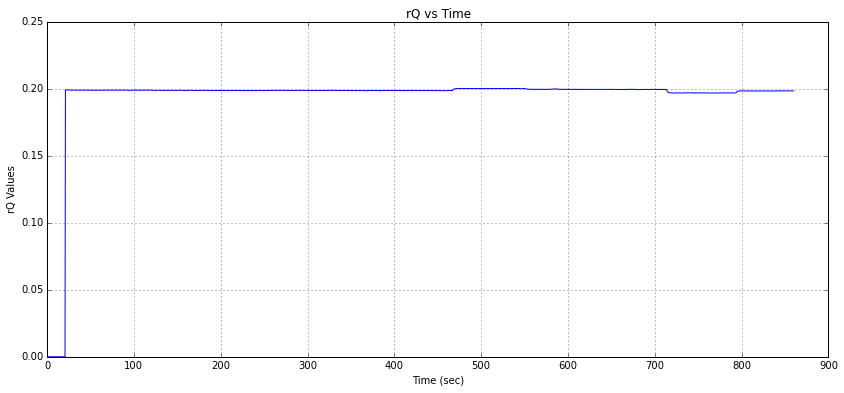

In [7]:
fig = plt.figure(figsize=(14,6), dpi=300)
plot(y,f)
xlabel('Time (sec)')
ylabel('rQ Values')
title('rQ vs Time')
grid(True)
fig.savefig("rqvstime_interference.pdf", dpi=300)

## Analyzing the data

We want to make sure the data is consistent over a period of time.  To do that we can look at the standard deviation of the data.  However, we also need to know what is happening external to what the SDR sees.  Ideally there is no change to the signal due to the external signals that are taking place near and around the 1.4 GHz that our SDR is tuned to.  However, we do observe a slight change around 480 seconds and a second one at 720 seconds.  These are due to the signal being very close to our signal and happens when we get closer to 1.4 GHz.  It should also be noted that our signal generator does also produce harmonics in addition to the main signal.  Some of these can be observed in the images below.  Some of these harmonics were also close to our 1.4 GHz frequency and so these could also be causing some artifical increase in the total power readings.

|Time Index (Sec)|Frequency (MHz)
|--------|-----------------------
| 030    | 900 MHz
| 220    | 800 MHz
| 350    | 1100 MHz
| 480    | 1200 MHz
| 580    | 1300 MHz
| 720    | 1400 MHz
| 790    | Signal OFF

The following images show images captured from the spectrum analyzer at each frequency change.  It was this information and the times that were recorded that we were able to recreate the table above.  

![900 MHz](https://lh4.googleusercontent.com/-uNpsBwD-tl0/VQh7_QDOJGI/AAAAAAAB9zg/aIZbiUbOMWQ/w800-h480-no/ex900.bmp)

![800 MHz](https://lh6.googleusercontent.com/-nLG4jEKyNbU/VQh7-AbaKfI/AAAAAAAB9zU/PmidchP6c8Y/w800-h480-no/ex800.bmp)

![1100 MHz](https://lh6.googleusercontent.com/-6LMJwbrx5mY/VQh71nVvhAI/AAAAAAAB9yk/bI1cTng5sJM/w800-h480-no/ex11ghz.bmp)

![1200 MHz](https://lh6.googleusercontent.com/-sCKOkhNqRRA/VQh73twbIuI/AAAAAAAB9yw/coVto3RKZ4Q/w800-h480-no/ex12ghz.bmp)

![1300 MHz](https://lh4.googleusercontent.com/-r8bQfBBR4Uw/VQh75QD7JJI/AAAAAAAB9y8/N47FilskbUc/w800-h480-no/ex13ghz.bmp)

![1400 MHz](https://lh6.googleusercontent.com/-5JELkpRbKGk/VQh77u2su2I/AAAAAAAB9zI/4kHT9sH4u00/w800-h480-no/ex14ghz.bmp)

![Signal Off](https://lh4.googleusercontent.com/-XUvoum7YmQo/VQh8A0La9iI/AAAAAAAB9zs/eMj3p8dHGuI/w800-h480-no/exoff.bmp)

We will now take a closer look at the information graphed.

- - -

First, let's trim the very begining, this was due to the fact that we did not turn on the DC multiplier right away.  Therefor the values were not zeros and were not removed with the remove zeros function.

In [8]:
f = f[(22*2):]
y = y[(22*2):]

## Plot the data
We now want to plot the data.  Since we are interested in using these in my thesis, we will also configure matplotlib to use the $\LaTeX$ compiler so the graphs will insert nicely into the thesis.

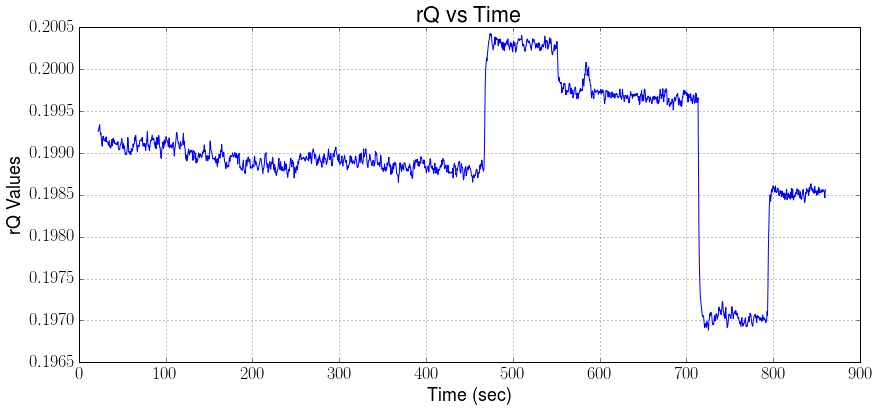

In [9]:
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
fig = plt.figure(figsize=(14,6), dpi=300)
plot(y,f)
xlabel('Time (sec)')
ylabel('rQ Values')
title('rQ vs Time')
grid(True)
fig.savefig("rqvstime_zoom.pdf", dpi=300)

Now let's do a standard deviation on this data and we also want to generate the points to do a polynominal fit to the data.

In [10]:
a = numpy.std(f)
print a
p = numpy.polyfit(y,f,3)
print p

0.000811818
[ -2.70322617e-11   2.93068009e-08  -7.87723062e-06   1.99476079e-01]


Since there is some noise in the signal, even with the integration there, let's do a polynominal fit to the data.  For the next graph we are using a third order polynominal fit to the data.

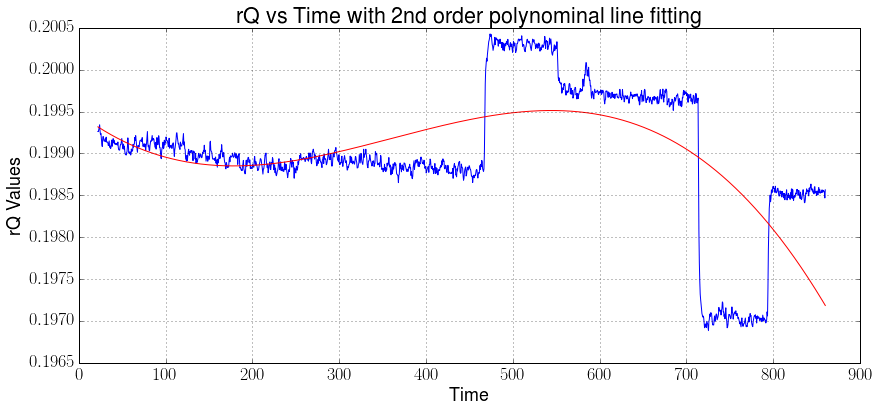

In [11]:
fig = plt.figure(figsize=(14,6), dpi=300)
plot(y,f)
plot(y,p[0]*y*y*y+p[1]*y*y+p[2]*y+p[3],'r-')
xlabel('Time')
ylabel('rQ Values')
title('rQ vs Time with 2nd order polynominal line fitting')
grid(True)
fig.savefig("rqvstime_polyfit.pdf", dpi=300)

Let's now look at the standard deviation with the data.  First we will smooth out the line and then plot the standard deviation on top of that line.

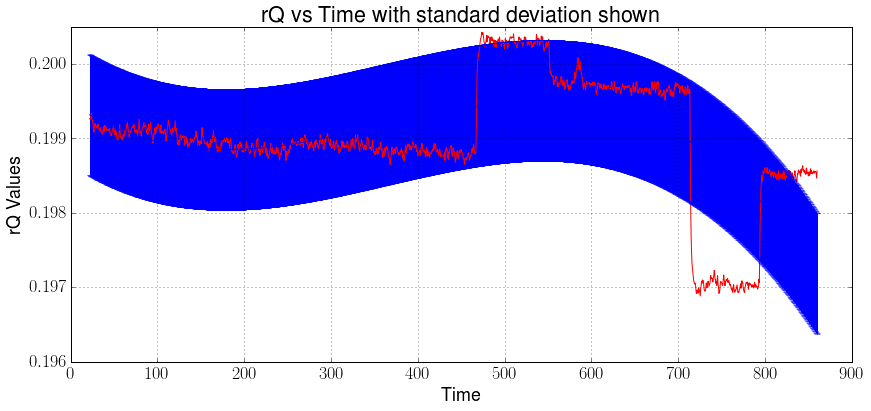

In [12]:
fig = plt.figure(figsize=(14,6), dpi=300)
b = p[0]*y*y*y+p[1]*y*y+p[2]*y+p[3]
plot(y,f,'r-')
errorbar(y,b,a)
xlabel('Time')
ylabel('rQ Values')
title('rQ vs Time with standard deviation shown')
grid(True)
fig.savefig("rqvstime_stddev.pdf", dpi=300)

- - -
# Rejection analysis

The main point of this experiment was to show that the software defined radio does indeed ignore signals that fall outside of the bandwidth that it is set to.  The bandwidth is also the sample rate to which the software defined radio is set and sets the stage for almost all other calculations done within the software defined radio.  No system is perfect and even though the software defined radio is a digital radio, it still has analog components.  It was expected that there would be some leakage of additional power information from nearby signals.  In addition, the signal generator used is also not perfect and some harmonics could also be influencing these numbers.  Finally, the DC gain multiplier used was 1000, which means that we are magnifying the information seen by 1000.  So while some of these changes look large, they are not really that large.  Some of this however would hold true when using the LNAs in the radiometer, though even the LNAs do not amplify the signal quite as high as what was done in this experiment.

In conclusion, the SDR did an excellent job in rejecting signals that fell outside the bandwidth to which it was listening.